In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt

In [3]:
tickers = ["PG", "BEI.DE"]

securities_data = pd.DataFrame()

for ticker in tickers:
    securities_data[ticker] = web.DataReader(ticker, data_source="yahoo", start="2007-1-1")["Adj Close"]

In [4]:
# using np.log() because we will analise the data of the securities separately 
securities_return = np.log(securities_data / securities_data.shift(1))

## Equal weighting scheme

Assuming that we have a equality weight portfolio invested 50% in P&G and 50% in Beiesdorf

In [5]:
weights = np.array([0.5, 0.5])

### Portfolio Variance:

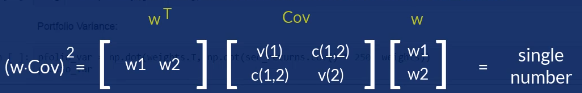

The transposed version of the weights vector **(weights.T)** must be multiplied by the annualized covariance matrix **(np.dot(securities_return.cov() * 250)** and then multipled by the normal weights vector **weights**.

In [7]:
pfolio_variance = np.dot(weights.T, np.dot(securities_return.cov() * 250, weights))

print(f"Portfolio Variance: {pfolio_variance}")

Portfolio Variance: 0.02650984702004936


### Portfolio Volatility

If we are interested in the Portfolio volatility, we should raised the expression to the power of 0.5

In [8]:
pfolio_volatility = np.dot(weights.T, np.dot(securities_return.cov() * 250, weights)) ** 0.5
print(pfolio_volatility)

0.1628184480335363


In [10]:
print(f"Portfolio Volatility is {round(pfolio_volatility, 5) * 100} %")

Portfolio Volatility is 16.282 %
